In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import pandas as pd
import pydst
dst = pydst.Dst(lang='en')
import ipywidgets as widgets
%matplotlib inline

**NOTE** 
hej hej 

In [2]:
#Ultimately, we want to look at the share of people who have a bachelor's degree or higher across municipalities and time
#So we want the table HFUDD10
dst.get_data(table_id = 'HFUDD10')

#Now, we take a look at the variabels
hfudd_var = dst.get_variables(table_id='HFUDD10')
hfudd_var

#Next, look at the dictionary under values, to see the categories in order to specify what variables we need
udd = hfudd_var.loc[2,'values']
udd

#First, we create a list of the main categories i.e. education level higher or equal to bachelor
# Next we pick them from the HFUDD10 table and put into the dataframe hfudd10
hfudd_list = ['TOT','H60','H70','H80']
hfudd10 = dst.get_data(table_id = 'HFUDD10', variables={'BOPOMR':['*'], 'HFUDD':hfudd_list, 'TID':['*']})
hfudd10.tail()

#Drop unnecessary columns
hfudd10.drop(['ALDER','HERKOMST','KØN'], axis=1, inplace=True)

#Delete all rows that is not a municipality in the residence column
for val in ['Region', 'Province', 'All Denmark']: 
    I = hfudd10.BOPOMR.str.contains(val)
    hfudd10 = hfudd10.loc[I == False]
    
#Select all of the higher education categories sum them across each municipality and year.
group = hfudd10.loc[(hfudd10['HFUDD'] != 'Total')].copy()
group1 = group.groupby(['BOPOMR', 'TID'])['INDHOLD'].sum()
group2 = pd.DataFrame(group1)
group2.rename(columns = {'INDHOLD':'HIGH_EDU'}, inplace=True) #Rename column

#Select the total in each municipality and year.
total = hfudd10.loc[(hfudd10['HFUDD'] == 'Total')].copy()
total1 = total.groupby(['BOPOMR', 'TID'])['INDHOLD'].sum()
total2 = pd.DataFrame(total1)
total2.rename(columns = {'INDHOLD':'TOTAL'}, inplace=True) #Rename column

#Merge the data, reset index and get some proper variable names
merge = pd.merge(group2,total2,how='left',on=['BOPOMR','TID'])
merge['HIGH_EDU_SHARE'] = merge['HIGH_EDU'] / merge['TOTAL'] * 100
merge.reset_index(inplace=True)
merge.rename(columns = {'BOPOMR':'MUNICIPALITY','TID':'YEAR'}, inplace=True) #Rename column
hfudd10 = merge

In [3]:
#INDKP106


#2
indkp106_vars = dst.get_variables(table_id = 'INDKP106')

#3
variables = {'OMRÅDE':['*'], 'ENHED':['118'], 'KOEN':['MOK'], 'ALDER1':['00'], 'INDKINTB':['000'], 'TID':['*']}


INDKP106 = dst.get_data(
    table_id = 'INDKP106',
    variables = variables)


regioner = ['All Denmark', 'Province Byen København', 'Province Københavns omegn', 'Province Nordsjælland', 'Province Bornholm', 'Province Østsjælland', 'Province Vest- og Sydsjælland', 'Province Fyn', 'Province Sydjylland', 'Province Østjylland','Province Vestjylland', 'Province Nordjylland']

#INDKP = INDKP106.drop(regioner, axis = 1)


INDKP106_sort = INDKP106.sort_values(['OMRÅDE', 'TID']) # Sortere på Område og ÅR
INDKP106_sort.drop(['ENHED', 'KOEN', 'ALDER1', 'INDKINTB'], axis = 1, inplace = True)
#INDKP106_sort.reset_index(inplace = True)
INDKP106_sort.rename(columns = {'OMRÅDE': 'MUNICIPALITY', 'ENHED': 'UNIT', 'KOEN': 'GENDER', 'INDKINTB': 'AVGINCOME', 'TID': 'YEAR'}, inplace = True)

In [4]:
#FOLK1C
tables = dst.get_tables(subjects=['02'])
folk_vars = dst.get_variables(table_id='FOLK1C')
variables = {'OMRÅDE':['*'],'HERKOMST':["*"],"TID":["*"]}
folk_api = dst.get_data(table_id = 'FOLK1C', variables=variables)
folk_q1 = folk_api[folk_api["TID"].str.contains("Q1")]
folk_q1["TID"]=pd.to_datetime(folk_q1["TID"])
folk_q1["YEAR"] = folk_q1["TID"].dt.year
folk_q1 = folk_q1.drop(["TID","KØN","IELAND","ALDER"],axis=1)

/Users/smeden/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/smeden/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [5]:
#Select all of the higher education categories sum them across each municipality and year.
group_folk = folk_q1.loc[(folk_q1['HERKOMST'] == 'Immigrants')].copy()
group1_folk = group_folk.groupby(['OMRÅDE', 'YEAR'])['INDHOLD'].sum()
group2_folk = pd.DataFrame(group1_folk)
group2_folk.rename(columns = {'INDHOLD':'immigrants'}, inplace=True) #Rename column

#Select the total in each municipality and year.
total_folk = folk_q1.loc[(folk_q1['HERKOMST'] == 'Total')].copy()
total1_folk = total_folk.groupby(['OMRÅDE', 'YEAR'])['INDHOLD'].sum()
total2_folk = pd.DataFrame(total1_folk)
total2_folk.rename(columns = {'INDHOLD':'TOTAL'}, inplace=True) #Rename column

#Merge the data, reset index and get some proper variable names
merge_folk = pd.merge(group2_folk,total2_folk,how='left',on=['OMRÅDE','YEAR'])
merge_folk['Immigrants_share'] = merge_folk['immigrants'] / merge_folk['TOTAL'] * 100
merge_folk.reset_index(inplace=True)
merge_folk.rename(columns = {'OMRÅDE':'MUNICIPALITY','YEAR':'YEAR'}, inplace=True) #Rename column
merge_folk

,MUNICIPALITY,YEAR,immigrants,TOTAL,Immigrants_share
0,Aabenraa,2008,5127,60189,8.518168
1,Aabenraa,2009,5306,60392,8.785932
2,Aabenraa,2010,5307,59978,8.848244
3,Aabenraa,2011,5376,59795,8.990718
4,Aabenraa,2012,5478,59600,9.191275
...,...,...,...,...,...
1360,Ærø,2016,349,6290,5.548490
1361,Ærø,2017,373,6177,6.038530
1362,Ærø,2018,389,6178,6.296536
1363,Ærø,2019,411,6058,6.784417


In [6]:
#KY038

variables = {'OMRÅDE':['*'], 'YDELSESTYPE':['10000'], 'HERKOMST': ['00'], 'HERKOMST1':['TOT'], 'TID':['*']} 

KY038 = dst.get_data(
    table_id = 'KY038',
    variables = variables)

for val in ['Region', 'Province', 'All Denmark']: 
    I = KY038.OMRÅDE.str.contains(val)
    KY038 = KY038.loc[I == False]



#'Province Byen København',

KY038_sort = KY038.sort_values(['OMRÅDE', 'TID']) # Sortere på Område og ÅR
KY038_sort.reset_index(inplace = True)
KY038_sort = KY038_sort.drop(['HERKOMST', 'HERKOMST1',"YDELSESTYPE","index"], axis = 1) # Dropper variable der angiver herkomst
KY038_sort = KY038_sort.rename(columns = {'OMRÅDE': 'MUNICIPALITY','TID':'YEAR',"INDHOLD":"COUNT_KTH"})

In [7]:
samlet_df = pd.merge(merge_folk, hfudd10, on=["MUNICIPALITY","YEAR"],how="inner")

In [8]:
samlet_df2 = pd.merge(samlet_df,INDKP106_sort,on=["MUNICIPALITY","YEAR"],how="left")

In [9]:
samlet_df3 = pd.merge(samlet_df2,KY038_sort,on=["MUNICIPALITY","YEAR"],how="left" )

In [10]:
samlet_df3.tail()
samlet_df3 = samlet_df3.drop(["TOTAL_y"],axis=1)
samlet_df3.columns=["Municipality", "Year","Immigrants","Population","Immigrants_share","High_EDU","High_EDU_share","Avg_income","Count_KTH"]


In [11]:
samlet_df3["Avg_KTH"]=samlet_df3["Count_KTH"]/samlet_df3["Population"]*100
samlet_df3.head()


,Municipality,Year,Immigrants,Population,Immigrants_share,High_EDU,High_EDU_share,Avg_income,Count_KTH,Avg_KTH
0,Aabenraa,2008,5127,60189,8.518168,1449,3.442051,166290.0,1018.0,1.691339
1,Aabenraa,2009,5306,60392,8.785932,1498,3.545143,167106.0,1213.0,2.008544
2,Aabenraa,2010,5307,59978,8.848244,1515,3.614027,181280.0,1351.0,2.252493
3,Aabenraa,2011,5376,59795,8.990718,1571,3.767025,184117.0,1312.0,2.194163
4,Aabenraa,2012,5478,59600,9.191275,1614,3.886815,188090.0,1339.0,2.246644


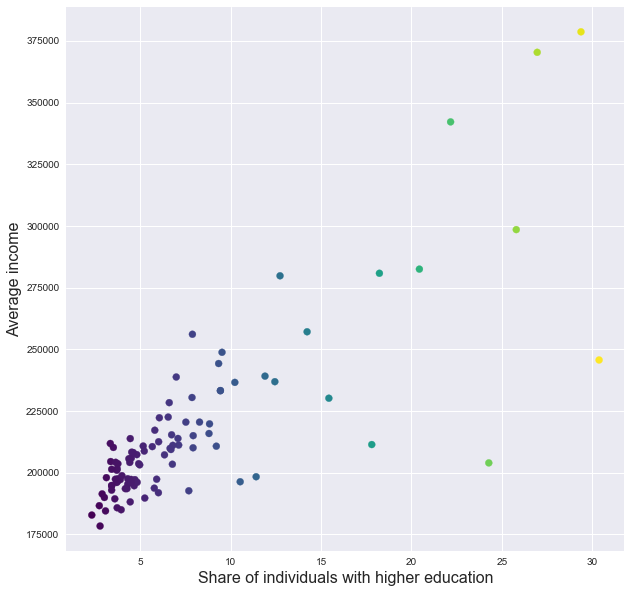

IntSlider(value=2010, max=2018, min=2010)

In [32]:
# Scatterplot of education share and average income

def edu(year):
    df = samlet_df3.loc[samlet_df3["Year"]==year].copy()
    plt.figure(figsize=(10,10))
    plt.scatter(df["High_EDU_share"], df["Avg_income"],cmap='viridis',c=df["High_EDU_share"])
    plt.xlabel("Share of individuals with higher education", fontsize=16)
    plt.ylabel("Average income", fontsize=16)
    
    
    
widgets.interact(edu,year=(2010,2018))
n_widget = widgets.IntSlider(
                value=2,
                min=2010,
                max=2018)

def on_value_change(change):
    edu(n=n_widget.value)

n_widget.observe(on_value_change)
display(n_widget)

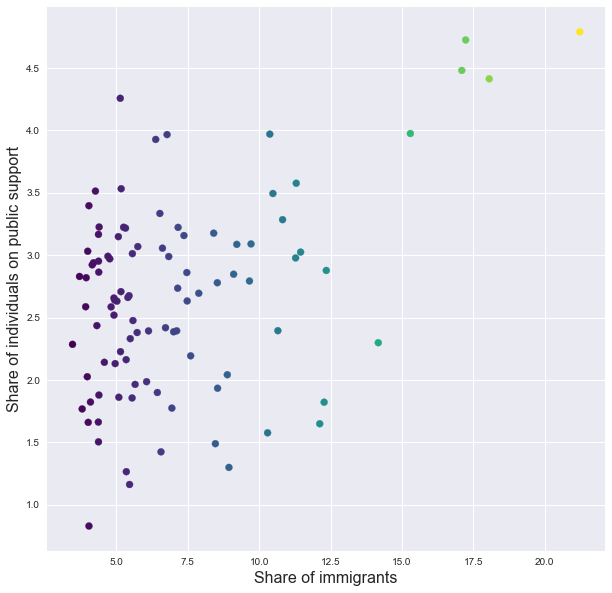

IntSlider(value=2010, max=2018, min=2010)

In [33]:
plt.scatter(plot_df18["Immigrants_share"], plot_df18["Avg_KTH"])
plt.scatter(plot_df08["Immigrants_share"], plot_df08["Avg_KTH"])
plt.xlabel("Avg_KTH")
plt.ylabel("Immigrants_share")


def immi(year):
    df = samlet_df3.loc[samlet_df3["Year"]==year].copy()
    plt.figure(figsize=(10,10))
    plt.scatter(df["Immigrants_share"], df["Avg_KTH"],cmap='viridis',c=df["Immigrants_share"])
    plt.xlabel("Share of immigrants", fontsize=16)
    plt.ylabel("Share of individuals on public support", fontsize=16)
    
    
    
widgets.interact(immi,year=(2010,2018))
n_widget = widgets.IntSlider(
                value=2,
                min=2010,
                max=2018)

def on_value_change(change):
    edu(n=n_widget.value)

n_widget.observe(on_value_change)
display(n_widget)

In [106]:
mean = samlet_df3.loc[samlet_df3["Year"] != 2019].copy()
mean["KTH_demeaned"] = samlet_df3.groupby(['Municipality'])['Avg_KTH'].transform(lambda x: x-x.mean())

cph = mean.loc[mean["Municipality"]=="Copenhagen"]
aal = mean.loc[mean["Municipality"]=="Aalborg"]
od = mean.loc[mean["Municipality"]=="Odense"]
aar = mean.loc[mean["Municipality"]=="Aarhus"]

[]

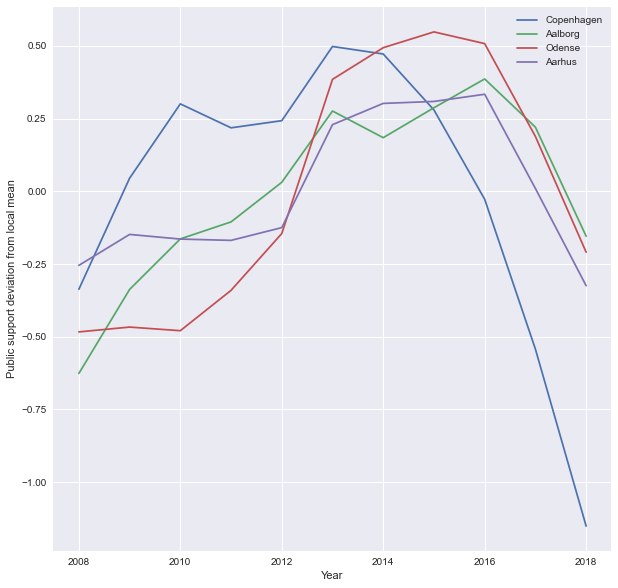

In [114]:
year = [2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]

plt.figure(figsize=(10,10))
plt.plot(year,cph["KTH_demeaned"],label="Copenhagen")
plt.plot(year,aal["KTH_demeaned"],label="Aalborg")
plt.plot(year,od["KTH_demeaned"],label="Odense")
plt.plot(year,aar["KTH_demeaned"],label="Aarhus")
plt.ylabel("Public support deviation from local mean")
plt.xlabel("Year")
plt.legend()
plt.plot()